In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
filepath = os.path.join('..', '..', 'CSV for ML models', 'Summer_Olympics_Host.csv')
filepath_host = os.path.join('..', '..', 'CSV for ML models', 'host_country.csv')

In [3]:
df_host = pd.read_csv(filepath_host)
df_host.head(5)

,Year,Host_City,Total Countries,Total Sports,Total Events,Host_Country
0,1896,Athina,12,9,43,Greece
1,1900,Paris,31,20,90,France
2,1904,St. Louis,14,18,95,USA
3,1906,Athina,20,13,74,Greece
4,1908,London,22,24,109,UK


In [4]:
df = pd.read_csv(filepath)
df.head(5)

,Year,Country,Total_Medals,Gold,Silver,Bronze,Athletes,Event,Sport,Host
0,1896,Greece,44,10,17,17,102,39,9,1
1,1896,USA,19,11,6,2,14,16,3,0
2,1896,Germany,14,7,5,2,19,27,6,0
3,1896,France,11,5,4,2,12,18,6,0
4,1896,UK,9,3,3,3,10,19,7,0


In [5]:
df = df.merge(df_host, on='Year')
df

,Year,Country,Total_Medals,Gold,Silver,Bronze,Athletes,Event,Sport,Host,Host_City,Total Countries,Total Sports,Total Events,Host_Country
0,1896,Greece,44,10,17,17,102,39,9,1,Athina,12,9,43,Greece
1,1896,USA,19,11,6,2,14,16,3,0,Athina,12,9,43,Greece
2,1896,Germany,14,7,5,2,19,27,6,0,Athina,12,9,43,Greece
3,1896,France,11,5,4,2,12,18,6,0,Athina,12,9,43,Greece
4,1896,UK,9,3,3,3,10,19,7,0,Athina,12,9,43,Greece
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,2016,"Virgin Islands, British",0,0,0,0,4,4,2,0,Rio de Janeiro,206,34,306,Brazil
2786,2016,"Virgin Islands, US",0,0,0,0,7,7,4,0,Rio de Janeiro,206,34,306,Brazil
2787,2016,Yemen,0,0,0,0,3,3,3,0,Rio de Janeiro,206,34,306,Brazil
2788,2016,Zambia,0,0,0,0,7,7,4,0,Rio de Janeiro,206,34,306,Brazil


In [6]:
df_usa = df.loc[df['Country']=='USA'].reset_index(drop=True)
df_usa

,Year,Country,Total_Medals,Gold,Silver,Bronze,Athletes,Event,Sport,Host,Host_City,Total Countries,Total Sports,Total Events,Host_Country
0,1896,USA,19,11,6,2,14,16,3,0,Athina,12,9,43,Greece
1,1900,USA,54,21,16,17,75,41,10,0,Paris,31,20,90,France
2,1904,USA,230,76,79,75,524,95,18,1,St. Louis,14,18,95,USA
3,1906,USA,23,12,5,6,38,28,5,0,Athina,20,13,74,Greece
4,1908,USA,46,22,12,12,122,52,10,0,London,22,24,109,UK
5,1912,USA,63,26,18,19,174,68,11,0,Stockholm,29,17,107,Sweden
6,1920,USA,95,41,27,27,288,113,18,0,Antwerpen,29,25,158,Belgium
7,1924,USA,99,45,27,27,299,108,18,0,Paris,45,20,131,France
8,1928,USA,56,22,18,16,280,96,15,0,Amsterdam,46,17,122,Netherlands
9,1932,USA,110,44,36,30,474,122,17,1,Los Angeles,47,18,131,USA


In [7]:
df_usa['Year_1'] = df_usa.index + 1
df_usa['Athletes per Event'] = df_usa['Athletes']/df_usa['Event']
df_usa['Participation in Events'] = df_usa['Event']/df_usa['Total Events']
df_usa['Participation in Sports'] = df_usa['Sport']/df_usa['Total Sports']

In [8]:
df_usa

,Year,Country,Total_Medals,Gold,Silver,Bronze,Athletes,Event,Sport,Host,Host_City,Total Countries,Total Sports,Total Events,Host_Country,Year_1,Athletes per Event,Participation in Events,Participation in Sports
0,1896,USA,19,11,6,2,14,16,3,0,Athina,12,9,43,Greece,1,0.875000,0.372093,0.333333
1,1900,USA,54,21,16,17,75,41,10,0,Paris,31,20,90,France,2,1.829268,0.455556,0.500000
2,1904,USA,230,76,79,75,524,95,18,1,St. Louis,14,18,95,USA,3,5.515789,1.000000,1.000000
3,1906,USA,23,12,5,6,38,28,5,0,Athina,20,13,74,Greece,4,1.357143,0.378378,0.384615
4,1908,USA,46,22,12,12,122,52,10,0,London,22,24,109,UK,5,2.346154,0.477064,0.416667
5,1912,USA,63,26,18,19,174,68,11,0,Stockholm,29,17,107,Sweden,6,2.558824,0.635514,0.647059
6,1920,USA,95,41,27,27,288,113,18,0,Antwerpen,29,25,158,Belgium,7,2.548673,0.715190,0.720000
7,1924,USA,99,45,27,27,299,108,18,0,Paris,45,20,131,France,8,2.768519,0.824427,0.900000
8,1928,USA,56,22,18,16,280,96,15,0,Amsterdam,46,17,122,Netherlands,9,2.916667,0.786885,0.882353
9,1932,USA,110,44,36,30,474,122,17,1,Los Angeles,47,18,131,USA,10,3.885246,0.931298,0.944444


In [9]:
usa_train = df_usa.loc[df_usa['Year']<=2000]
usa_test = df_usa.loc[df_usa['Year']>2000]

In [10]:
usa_train

,Year,Country,Total_Medals,Gold,Silver,Bronze,Athletes,Event,Sport,Host,Host_City,Total Countries,Total Sports,Total Events,Host_Country,Year_1,Athletes per Event,Participation in Events,Participation in Sports
0,1896,USA,19,11,6,2,14,16,3,0,Athina,12,9,43,Greece,1,0.875000,0.372093,0.333333
1,1900,USA,54,21,16,17,75,41,10,0,Paris,31,20,90,France,2,1.829268,0.455556,0.500000
2,1904,USA,230,76,79,75,524,95,18,1,St. Louis,14,18,95,USA,3,5.515789,1.000000,1.000000
3,1906,USA,23,12,5,6,38,28,5,0,Athina,20,13,74,Greece,4,1.357143,0.378378,0.384615
4,1908,USA,46,22,12,12,122,52,10,0,London,22,24,109,UK,5,2.346154,0.477064,0.416667
5,1912,USA,63,26,18,19,174,68,11,0,Stockholm,29,17,107,Sweden,6,2.558824,0.635514,0.647059
6,1920,USA,95,41,27,27,288,113,18,0,Antwerpen,29,25,158,Belgium,7,2.548673,0.715190,0.720000
7,1924,USA,99,45,27,27,299,108,18,0,Paris,45,20,131,France,8,2.768519,0.824427,0.900000
8,1928,USA,56,22,18,16,280,96,15,0,Amsterdam,46,17,122,Netherlands,9,2.916667,0.786885,0.882353
9,1932,USA,110,44,36,30,474,122,17,1,Los Angeles,47,18,131,USA,10,3.885246,0.931298,0.944444


In [11]:
X_train = usa_train[['Year_1','Athletes per Event', 'Participation in Events','Host']].values
X_train

array([[ 1.        ,  0.875     ,  0.37209302,  0.        ],
       [ 2.        ,  1.82926829,  0.45555556,  0.        ],
       [ 3.        ,  5.51578947,  1.        ,  1.        ],
       [ 4.        ,  1.35714286,  0.37837838,  0.        ],
       [ 5.        ,  2.34615385,  0.47706422,  0.        ],
       [ 6.        ,  2.55882353,  0.63551402,  0.        ],
       [ 7.        ,  2.54867257,  0.71518987,  0.        ],
       [ 8.        ,  2.76851852,  0.82442748,  0.        ],
       [ 9.        ,  2.91666667,  0.78688525,  0.        ],
       [10.        ,  3.8852459 ,  0.93129771,  1.        ],
       [11.        ,  2.82677165,  0.84666667,  0.        ],
       [12.        ,  2.38095238,  0.82352941,  0.        ],
       [13.        ,  2.15037594,  0.89261745,  0.        ],
       [14.        ,  2.11805556,  0.99310345,  0.        ],
       [15.        ,  1.98639456,  0.98      ,  0.        ],
       [16.        ,  2.17610063,  0.97546012,  0.        ],
       [17.        ,  2.

In [12]:
y_train = usa_train["Total_Medals"]
y_train = y_train.values.reshape(-1,1)
y_train

array([[ 19],
       [ 54],
       [230],
       [ 23],
       [ 46],
       [ 63],
       [ 95],
       [ 99],
       [ 56],
       [110],
       [ 57],
       [ 84],
       [ 76],
       [ 74],
       [ 71],
       [ 90],
       [107],
       [ 94],
       [ 94],
       [173],
       [ 94],
       [108],
       [101],
       [ 91]])

In [13]:
print(X_train.shape, y_train.shape)

(24, 4) (24, 1)


In [14]:
usa_test

,Year,Country,Total_Medals,Gold,Silver,Bronze,Athletes,Event,Sport,Host,Host_City,Total Countries,Total Sports,Total Events,Host_Country,Year_1,Athletes per Event,Participation in Events,Participation in Sports
24,2004,USA,101,36,39,26,533,254,31,0,Athina,200,34,301,Greece,25,2.098425,0.843854,0.911765
25,2008,USA,110,36,39,35,588,258,32,0,Beijing,203,34,302,China,26,2.279070,0.854305,0.941176
26,2012,USA,103,46,28,29,529,245,31,0,London,204,32,302,UK,27,2.159184,0.811258,0.968750
27,2016,USA,121,46,37,38,555,245,33,0,Rio de Janeiro,206,34,306,Brazil,28,2.265306,0.800654,0.970588


In [15]:
X_test = usa_test[['Year_1','Athletes per Event', 'Participation in Events', 'Host']].values
X_test

array([[25.        ,  2.0984252 ,  0.84385382,  0.        ],
       [26.        ,  2.27906977,  0.85430464,  0.        ],
       [27.        ,  2.15918367,  0.81125828,  0.        ],
       [28.        ,  2.26530612,  0.80065359,  0.        ]])

In [16]:
y_test = usa_test["Total_Medals"]
y_test = y_test.values.reshape(-1,1)
y_test

array([[101],
       [110],
       [103],
       [121]])

### Using Scaler

In [17]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [18]:
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.482964776515723
R-squared (R2 ): -13.55459657671919


In [22]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7615305680759272
Testing Score: -13.55459657671919


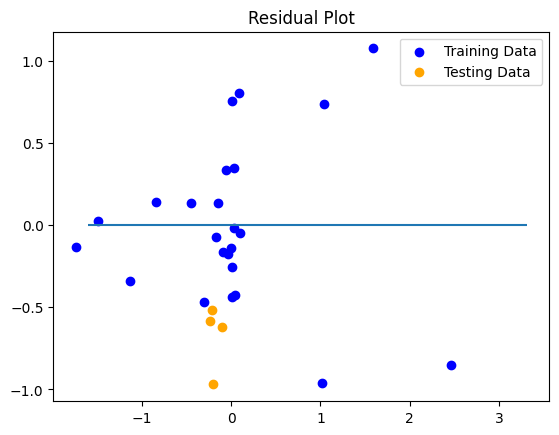

In [23]:
# Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data");
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot");

In [24]:
pd.DataFrame({"Predicted": (np.ravel(predicted)), "Actual": (np.ravel(y_test)), "Error": np.ravel(predicted) - np.ravel(y_test)})

,Predicted,Actual,Error
0,-0.210513,0.305651,-0.516163
1,-0.102419,0.515240,-0.617659
2,-0.233345,0.352226,-0.585571
3,-0.198667,0.771405,-0.970071
